<a href="https://colab.research.google.com/github/fboldt/postre/blob/main/aula03a_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X, y = dataset.data, dataset.target
X.shape, y.shape

((569, 30), (569,))

In [16]:
type(y[0])

numpy.int64

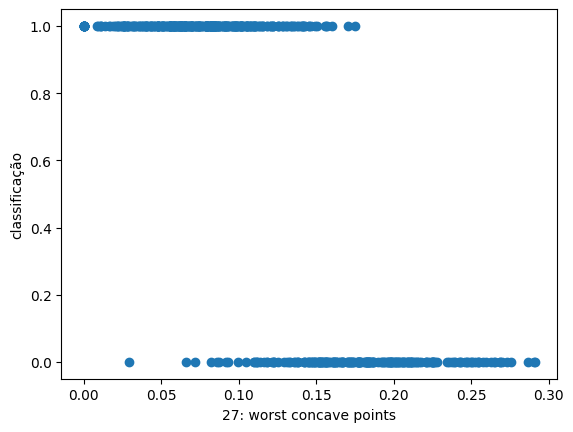

In [7]:
import matplotlib.pyplot as plt
i = 27
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel("classificação")
plt.scatter(X[:,i],y)
plt.show()

In [10]:
X27 = X[:,27:28]

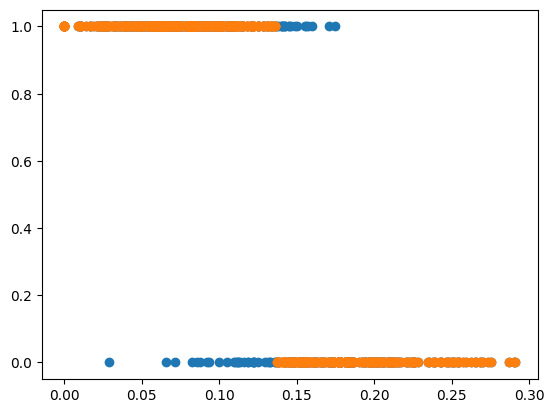

(0.08787346221441125, 0.9121265377855887)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class ClassificadorLinear(BaseEstimator, ClassifierMixin):
  def __init__(self):
    self.lrmodel = LinearRegression()
    self.limiar = 0.5
  def fit(self, X, y):
    self.lrmodel.fit(X, y)
  def predict(self, X, y=None):
    ypred = self.lrmodel.predict(X)
    ypred = (ypred>self.limiar).astype(int)
    return ypred

modelo = ClassificadorLinear()
modelo.fit(X27, y)
ypred = modelo.predict(X27)
plt.scatter(X27, y)
plt.scatter(X27, ypred)
plt.show()
mean_squared_error(y, ypred), accuracy_score(y, ypred)

In [19]:
1 - accuracy_score(y, ypred)

0.08787346221441128

In [29]:
modelo = ClassificadorLinear()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9648506151142355

In [32]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(solver="liblinear")
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), modelo.coef_, modelo.intercept_

(0.9595782073813708,
 array([[ 2.11743172,  0.10755408, -0.0712765 , -0.0026603 , -0.15483586,
         -0.40708918, -0.64915655, -0.34200387, -0.22674871, -0.02632768,
         -0.02244492,  1.27564669,  0.01689512, -0.09518242, -0.01687969,
          0.00312509, -0.04899734, -0.04026179, -0.0425205 ,  0.00622276,
          1.26583663, -0.33748624, -0.11918295, -0.02466934, -0.28685003,
         -1.15896635, -1.60323245, -0.65926289, -0.69729742, -0.1166056 ]]),
 array([0.39698113]))

In [33]:
from sklearn.linear_model import SGDClassifier
modelo = SGDClassifier()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), modelo.coef_, modelo.intercept_

(0.9209138840070299,
 array([[ 1.28719187e+03,  4.98269996e+02,  6.74151046e+03,
          1.75667608e+03,  6.73482475e+00, -2.75862402e+01,
         -5.34800666e+01, -2.14476794e+01,  1.33275453e+01,
          6.68725125e+00,  4.23709719e+00,  1.31093208e+01,
         -1.48951663e+02, -2.99920689e+03, -9.09596867e-02,
         -7.64100976e+00, -1.03934216e+01, -2.20619945e+00,
         -1.46572089e-02, -4.70319393e-01,  1.36249807e+03,
          1.70278598e+02,  6.11239890e+03, -2.77625497e+03,
          5.21247914e+00, -9.88689145e+01, -1.38962773e+02,
         -3.48914325e+01,  6.21443703e+00, -5.01444345e-02]]),
 array([1351.57789178]))

In [35]:
from sklearn.linear_model import Perceptron
modelo = Perceptron()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), modelo.coef_, modelo.intercept_

(0.9261862917398945,
 array([[ 2.30434100e+03,  2.97808000e+03,  1.32373800e+04,
          4.55750000e+03,  1.99728200e+01, -1.39147700e+01,
         -4.75552493e+01, -1.99746190e+01,  3.85718000e+01,
          1.62372600e+01,  6.11430000e+00,  2.13245700e+02,
         -1.26940700e+02, -6.19829200e+03,  9.33463000e-01,
         -3.70119900e+00, -6.05731830e+00, -8.79828000e-01,
          3.13196800e+00,  1.54238900e-01,  2.42195700e+03,
          3.69363000e+03,  1.31086400e+04, -6.70030000e+03,
          2.39875500e+01, -5.68726600e+01, -1.05821866e+02,
         -2.51252590e+01,  4.93057000e+01,  1.36139600e+01]]),
 array([301.]))

In [59]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class ClassificadorAleatorio(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    pass
  def predict(self, X, y=None):
    ypred = (np.random.uniform(low=0, high=1, size=(X.shape[0],))>0.5).astype(int)
    return ypred

modelo = ClassificadorAleatorio()
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.5272407732864675

In [44]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from collections import Counter

def maisFrequente(y):
  return Counter(y.flat).most_common(1)[0][0]

class ClassificadorZeroR(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.resposta = maisFrequente(y)
  def predict(self, X, y=None):
    y = np.empty((X.shape[0]))
    y[:] = self.resposta
    return y

modelo = ClassificadorZeroR()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.6274165202108963

In [45]:
sum(y)/len(y)

0.6274165202108963

In [60]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

1.0

In [74]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.4, random_state=42)
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
accuracy_score(yte, ypred)

0.9429824561403509